<h1>Parking places</h1>
<h2>Exploration</h2>
<p>
    <ol>
        <li>Load data</li>
        <li>Group per parking_place per day (count # transactions)</li>
        <li>Select some data (garage_id, time window)</li>
        <li>Calculate rolling mean</li>
        <li>Show graph data</li>
        <li>Add data feautures</li>
        <li>bin data 'buzy' 'not-buzy'</li>
        <li>Classify</li>
    </ol>
        <b>2018-06-12 Wico Mulder</b>
</p>


In [18]:
%matplotlib inline
import pandas as pd

<h2>Load the data</h2>

In [23]:
path='../data/'
parking_transactions=pd.read_csv(path+'../Parkeren Data/parkeerdata/leeuwarden_garage_parking_transactions.csv',sep=";")

In [25]:
parking_locations=pd.read_csv(path+'../Parkeren Data/parkeerdata/leeuwarden_garage_parking_garage_gps.csv',sep=";",decimal=",")

In [26]:
print("parking_transactions",parking_transactions.shape)
print("parking_locations",parking_locations.shape)

parking_transactions (3380160, 9)
parking_locations (5, 5)


<h2>NAN Analysis</h2>

In [27]:
parking_transactions.card_type_id.unique()
parking_transactions_220=parking_transactions[parking_transactions.card_type_id==220]
parking_transactions_221=parking_transactions[parking_transactions.card_type_id==221]
print("parking_transactions_220",parking_transactions_220.shape)
print("parking_transactions_221",parking_transactions_221.shape)

parking_transactions_220 (3025086, 9)
parking_transactions_221 (355074, 9)


In [28]:
parking_transactions=parking_transactions.drop(['pay_parking_dt','entry_station_cid','pay_station_cid','exit_station_cid'],axis=1)
parking_transactions.head()

,garage_id,card_type_id,transaction_id,start_parking_dt,end_parking_dt
0,36,220,2912536,1-1-2016 00:14,1-1-2016 06:17
1,36,220,2912538,1-1-2016 00:27,1-1-2016 05:11
2,36,220,2912537,1-1-2016 00:27,1-1-2016 05:56
3,36,220,2912539,1-1-2016 00:28,1-1-2016 08:14
4,36,220,2912540,1-1-2016 00:34,1-1-2016 04:09


In [29]:
parking_transactions.isnull().sum()

garage_id               0
card_type_id            0
transaction_id          0
start_parking_dt    37956
end_parking_dt      99518
dtype: int64

In [30]:
selection=parking_transactions[pd.isnull(parking_transactions).any(axis=1)]
selection

,garage_id,card_type_id,transaction_id,start_parking_dt,end_parking_dt
9,36,220,2912545,1-1-2016 00:40,NaN
77,36,220,2912635,1-1-2016 12:17,NaN
80,36,220,2912639,1-1-2016 12:28,NaN
200,36,220,2912782,1-1-2016 17:35,NaN
250,36,221,2912833,1-1-2016 18:36,NaN
352,38,220,937386,2-1-2016 07:23,NaN
356,39,221,1645924,2-1-2016 07:43,NaN
360,37,220,1666397,2-1-2016 07:52,NaN
362,38,220,937390,2-1-2016 07:57,NaN
396,38,220,937401,2-1-2016 08:55,NaN


<h2>Decided to remove the lines</h2> although we then skew-the data, more are entering than leaving.. we can correct for that later</h2>

In [31]:
print("parking_transactions",parking_transactions.shape)
parking_transactions=parking_transactions.dropna()
print("parking_transactions",parking_transactions.shape)


parking_transactions (3380160, 5)
parking_transactions (3242686, 5)


<h2>Looking at in_flow only here</h2>
<p>Later on we prepare data, and look at #in and #out</p>
<h2>Group the visits per parking_place per day</h2>


In [32]:
parking_transactions['visit_datetime'] = pd.to_datetime(parking_transactions['start_parking_dt'], format='%d-%m-%Y %H:%M')
#'1-1-2016 00:14' 
parking_transactions['visit_date'] = parking_transactions['visit_datetime'].dt.date

In [33]:
visitors_per_day = parking_transactions.groupby(['garage_id','visit_date'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
visitors_per_day.head()

,garage_id,visit_date,count_transactions
0,36,2016-01-01,323
1,36,2016-01-02,2500
2,36,2016-01-03,1191
3,36,2016-01-04,1232
4,36,2016-01-05,446


<h2>Add date features</h2>

In [34]:
visitors_per_day['visit_datetime'] = pd.to_datetime(visitors_per_day['visit_date'])
visitors_per_day['year']=visitors_per_day.visit_datetime.dt.year
visitors_per_day['week']=visitors_per_day.visit_datetime.dt.week
visitors_per_day['month']=visitors_per_day.visit_datetime.dt.month
visitors_per_day['day']=visitors_per_day.visit_datetime.dt.day
visitors_per_day['dayofyear']=visitors_per_day.visit_datetime.dt.dayofyear
visitors_per_day['weekday']=visitors_per_day.visit_datetime.dt.weekday
visitors_per_day.head(5)

,garage_id,visit_date,count_transactions,visit_datetime,year,week,month,day,dayofyear,weekday
0,36,2016-01-01,323,2016-01-01,2016,53,1,1,1,4
1,36,2016-01-02,2500,2016-01-02,2016,53,1,2,2,5
2,36,2016-01-03,1191,2016-01-03,2016,53,1,3,3,6
3,36,2016-01-04,1232,2016-01-04,2016,1,1,4,4,0
4,36,2016-01-05,446,2016-01-05,2016,1,1,5,5,1


<h2>Make a selection of the data and show this</p></h2>
* Pick a garage_id, and a time_window


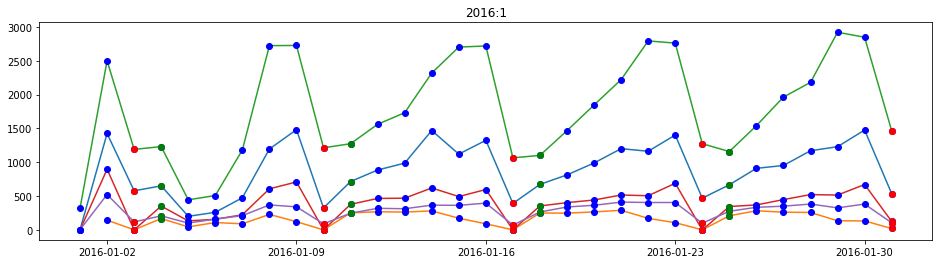

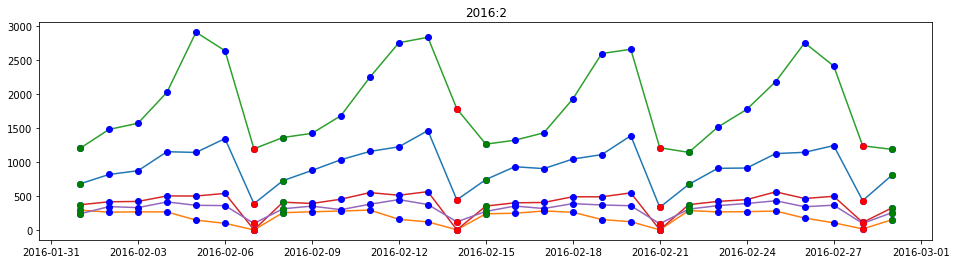

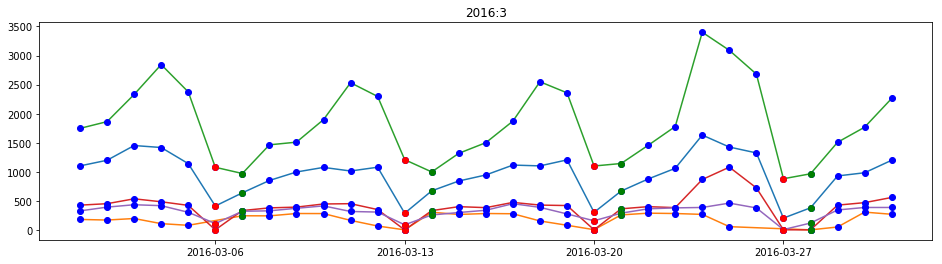

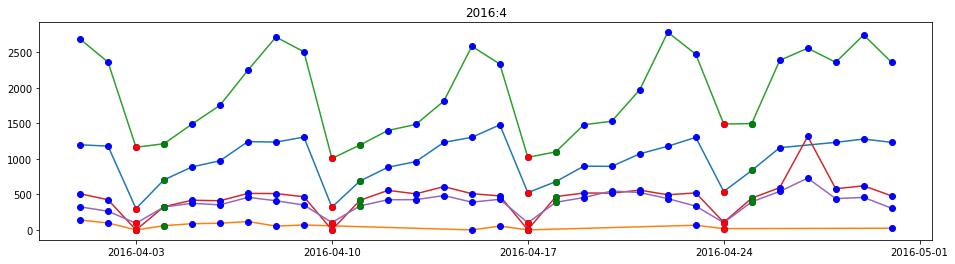

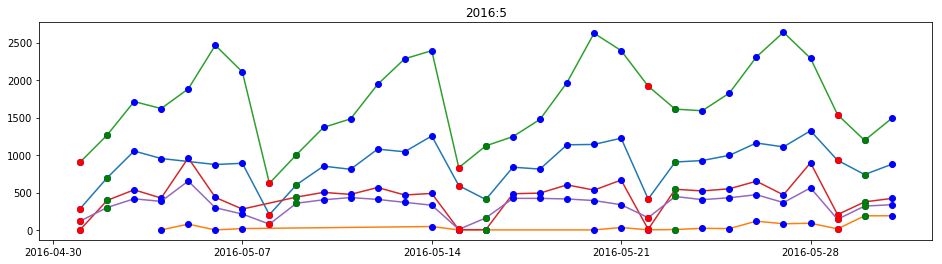

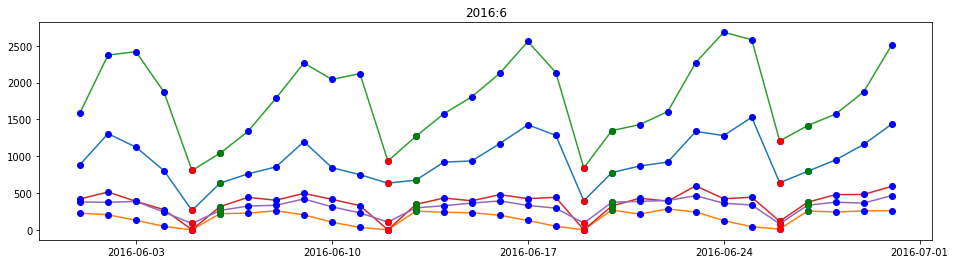

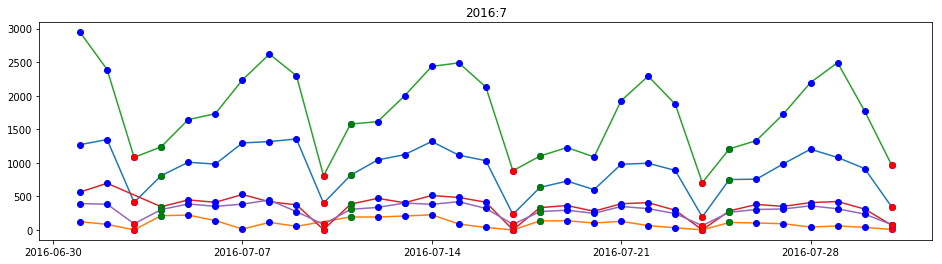

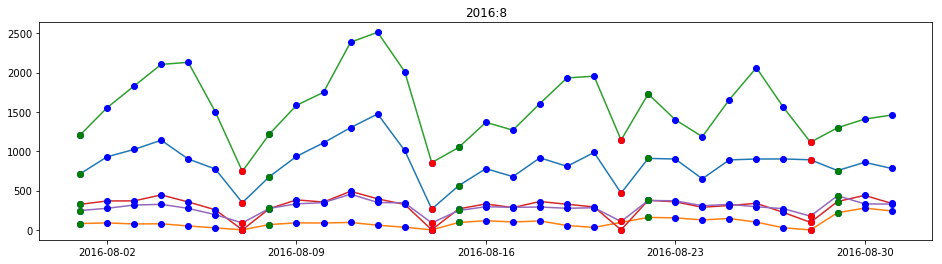

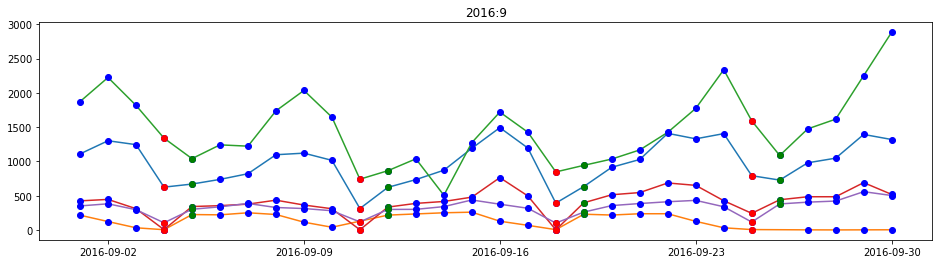

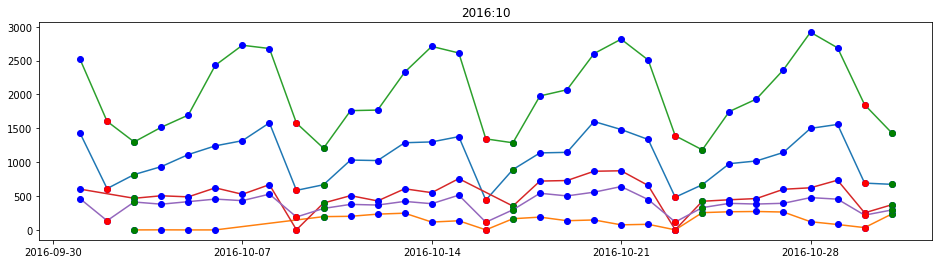

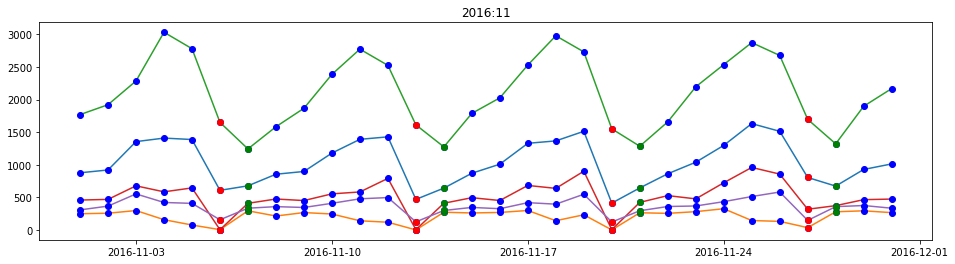

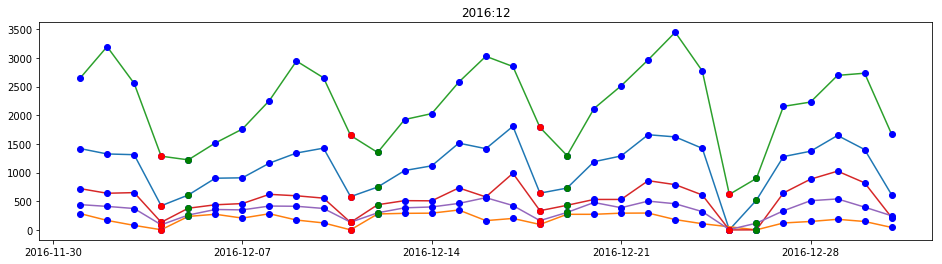

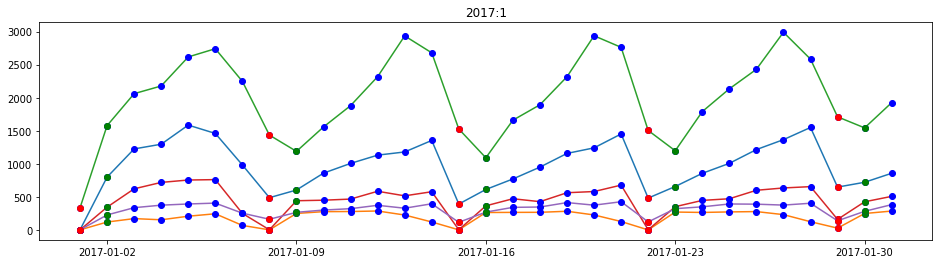

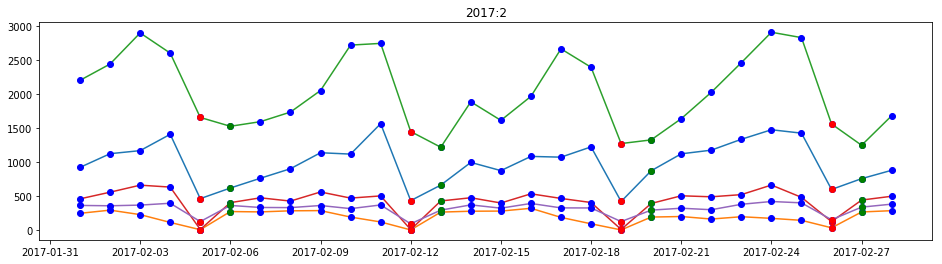

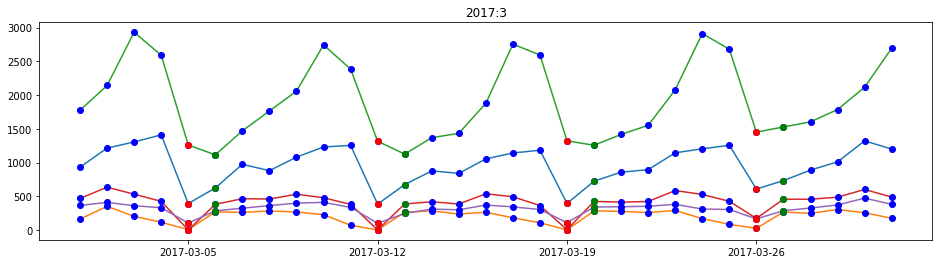

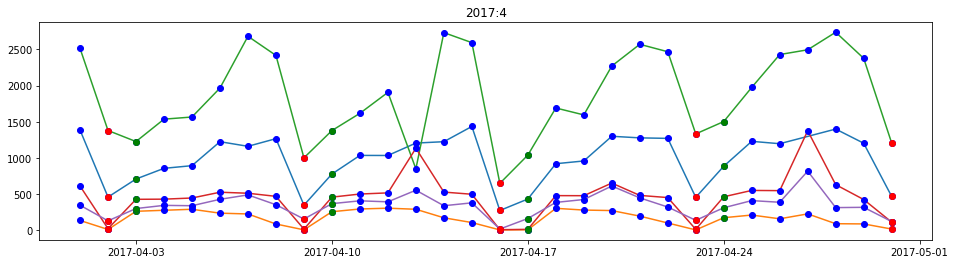

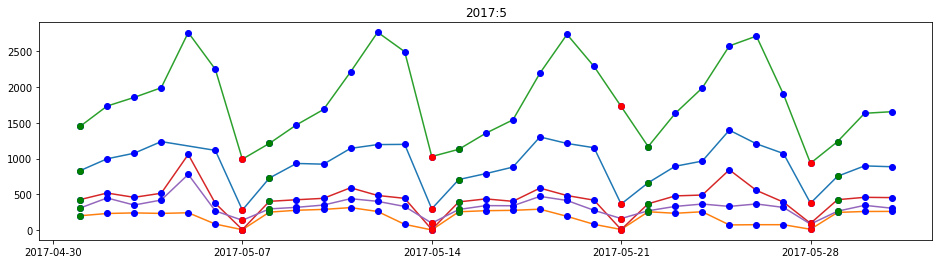

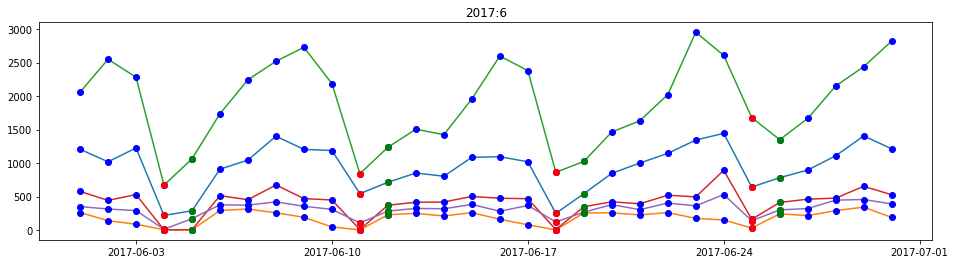

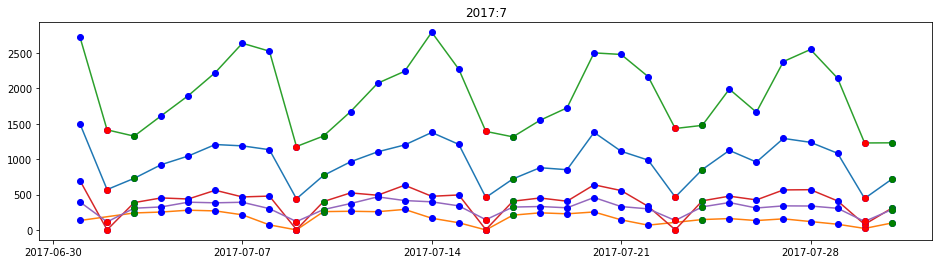

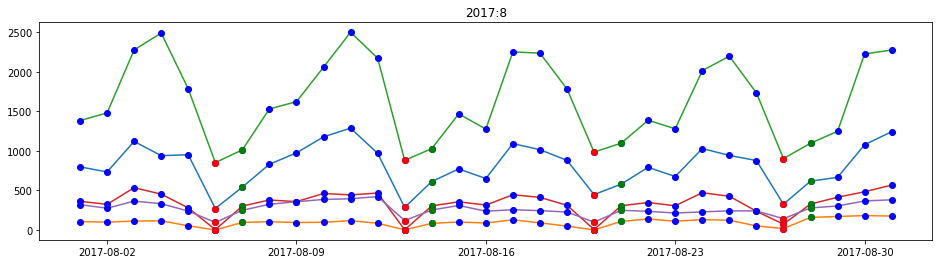

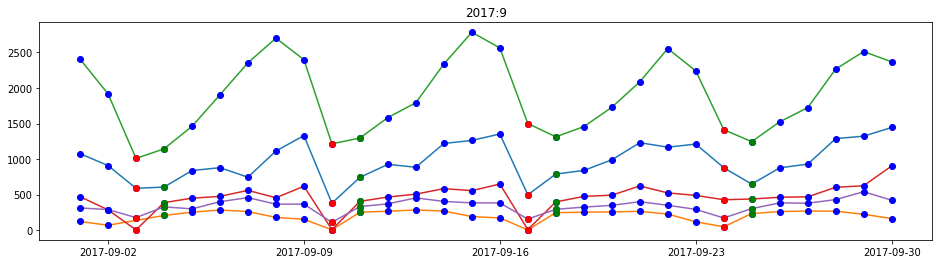

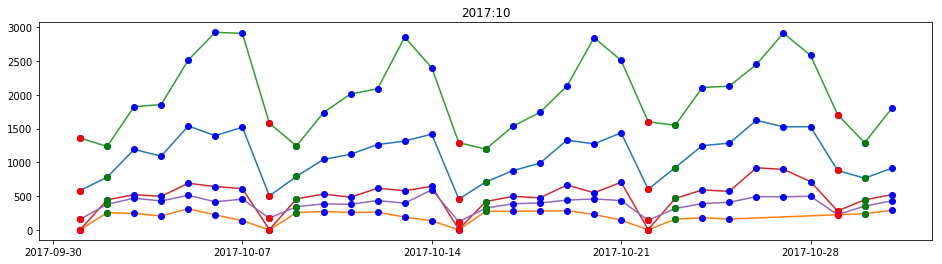

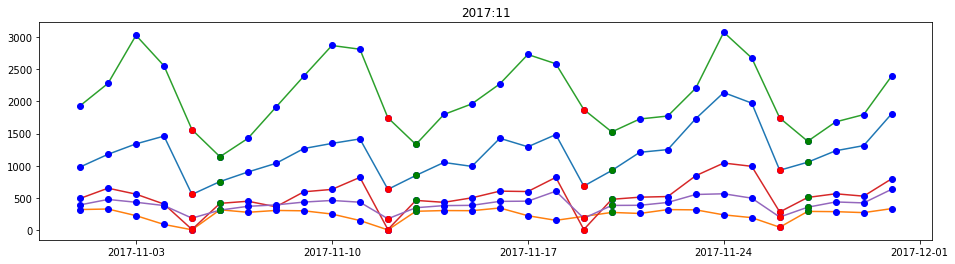

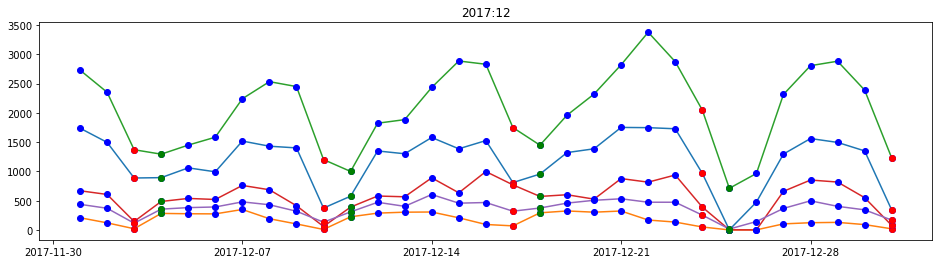

In [35]:
import matplotlib.pyplot as plt
garage_id=36
for year in range(2016,2017+1):
    for month in range(1,12+1):
        fig = plt.figure(figsize=(16, 4))   
        for garage_id in parking_locations.garage_id.unique():
            mask = (visitors_per_day['month']==month) & (visitors_per_day['year']==year) & (visitors_per_day['garage_id']==garage_id)
            data= visitors_per_day.loc[mask]
            plt.plot(data['visit_date'],data['count_transactions'])
            plt.plot(data['visit_date'],data['count_transactions'],"bo")
            saturdays=data[data['weekday']==6]
            sundays=data[data['weekday']==0]
            plt.plot(saturdays['visit_date'],saturdays['count_transactions'],"ro")
            plt.plot(sundays['visit_date'],sundays['count_transactions'],"go")
        plt.title(str(year)+":"+str(month))
        plt.show()       


<h2>per weekday</h2>

In [36]:
parking_transactions['weekday_name'] = parking_transactions['visit_datetime'].dt.weekday_name

visitors_per_weekday = parking_transactions.groupby(['weekday_name','garage_id'])['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
visitors_per_weekday.head()


weekday_name  garage_id
Friday        36           326815
              37            68944
              38            49131
              39           150949
              40            19064
dtype: int64

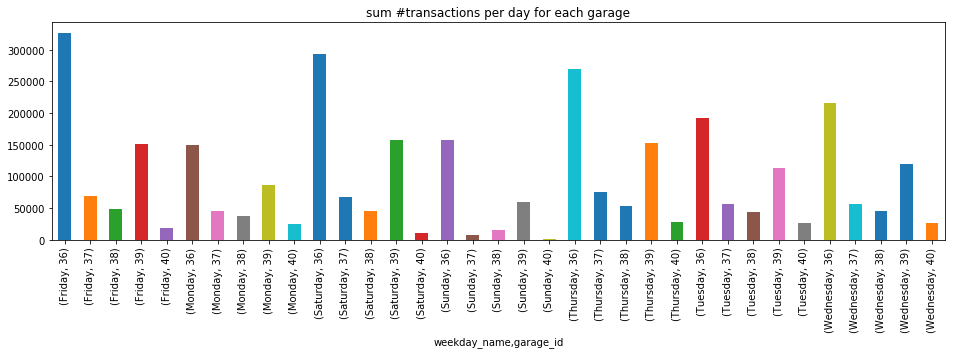

In [37]:
visitors_per_weekday.plot(title="sum #transactions per day for each garage", kind="bar",figsize=(16,4))

<h2>relatively to capacity</h2>

In [38]:
#group again, but this time, no indexes, just a flat table
visitors_per_weekday = parking_transactions.groupby(['weekday_name','garage_id'],as_index=False)['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
df_visitors_per_weekday=pd.DataFrame(visitors_per_weekday)
df_visitors_per_weekday.head()
merged_data = pd.merge(df_visitors_per_weekday,parking_locations, on='garage_id', how='inner')
merged_data['count_div_capacity']=merged_data['count_transactions']/merged_data['capacity_value']
merged_data.head()

,weekday_name,garage_id,count_transactions,garage_nm,capacity_value,latitude,longitude,count_div_capacity
0,Friday,36,326815,Zaailand,720,53.199224,5.795601,453.909722
1,Monday,36,150330,Zaailand,720,53.199224,5.795601,208.791667
2,Saturday,36,293610,Zaailand,720,53.199224,5.795601,407.791667
3,Sunday,36,157564,Zaailand,720,53.199224,5.795601,218.838889
4,Thursday,36,268794,Zaailand,720,53.199224,5.795601,373.325000


In [39]:
corrected_data=merged_data.groupby(['weekday_name','garage_id'])['count_div_capacity'].sum()
corrected_data.head()


weekday_name  garage_id
Friday        36           453.909722
              37           110.310400
              38           125.976923
              39           287.521905
              40            76.256000
Name: count_div_capacity, dtype: float64

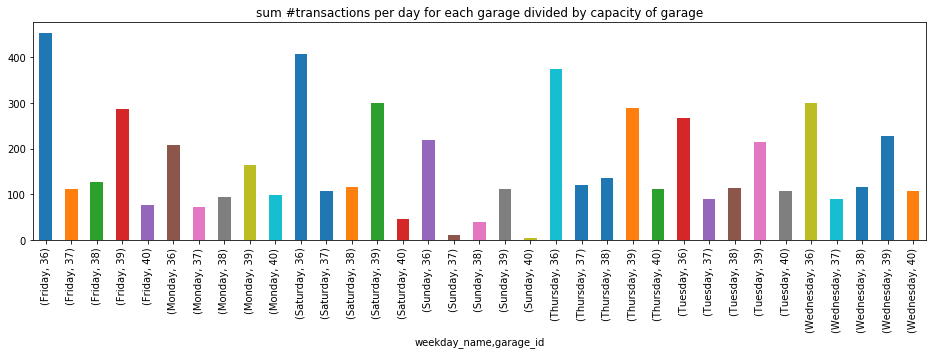

In [40]:
corrected_data.plot(title="sum #transactions per day for each garage divided by capacity of garage",kind="bar",figsize=(16,4))

<h2>and now... per hour instead of per day<h2>


In [41]:
parking_transactions['hour'] = parking_transactions['visit_datetime'].dt.hour
visitors_per_hour = parking_transactions.groupby(['hour','garage_id'])['transaction_id'].count().rename(columns={'transaction_id':'count_transactions'})
visitors_per_hour.head()

hour  garage_id
0     36           7958
      37             27
      38            161
      39             71
      40             20
dtype: int64

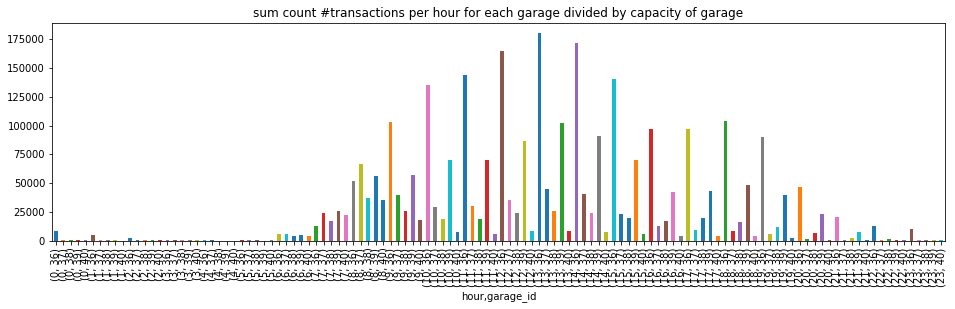

In [42]:
visitors_per_hour.plot(title="sum count #transactions per hour for each garage divided by capacity of garage",kind="bar",figsize=(16,4))

In [43]:
parking_transactions.head()

,garage_id,card_type_id,transaction_id,start_parking_dt,end_parking_dt,visit_datetime,visit_date,weekday_name,hour
0,36,220,2912536,1-1-2016 00:14,1-1-2016 06:17,2016-01-01 00:14:00,2016-01-01,Friday,0
1,36,220,2912538,1-1-2016 00:27,1-1-2016 05:11,2016-01-01 00:27:00,2016-01-01,Friday,0
2,36,220,2912537,1-1-2016 00:27,1-1-2016 05:56,2016-01-01 00:27:00,2016-01-01,Friday,0
3,36,220,2912539,1-1-2016 00:28,1-1-2016 08:14,2016-01-01 00:28:00,2016-01-01,Friday,0
4,36,220,2912540,1-1-2016 00:34,1-1-2016 04:09,2016-01-01 00:34:00,2016-01-01,Friday,0


<h2>per garage per day per hour</h2>
<p>First, make seperate datasets --> per garage</p>



In [44]:
for garage_id in parking_locations.garage_id.unique():
    mask = parking_transactions['garage_id']==garage_id
    data= parking_transactions.loc[mask]
    name="../data/out-parking_events-garage"+str(garage_id)+".csv"
    print("Written to",name,"shape",data.shape)
    data.to_csv(name,sep=";",index=False)

Written to ../data/out-parking_events-garage39.csv shape (837402, 9)
Written to ../data/out-parking_events-garage40.csv shape (137207, 9)
Written to ../data/out-parking_events-garage36.csv shape (1604206, 9)
Written to ../data/out-parking_events-garage37.csv shape (375616, 9)
Written to ../data/out-parking_events-garage38.csv shape (288255, 9)


<h2>Go to step 3</h2>